The outcome is a binary classification. Prompt suggests RandomForest to identify most predictive variables.

In [2]:
import pandas as pd
df = pd.read_csv("./data/customer_booking.csv", encoding="ISO-8859-1")
df = df.dropna()

Most impactful features in descending order: [('purchase_lead', 0.14452593907810202), ('flight_hour', 0.12055040032578163), ('length_of_stay', 0.11059444683078007), ('num_passengers', 0.04710707945634687), ('flight_duration', 0.03770357465733659)]
Fold 1 accuracy: 0.8504
F1 score: 0.20762711864406777
Precision: 0.5012787723785166
Recall: 0.13092852371409486


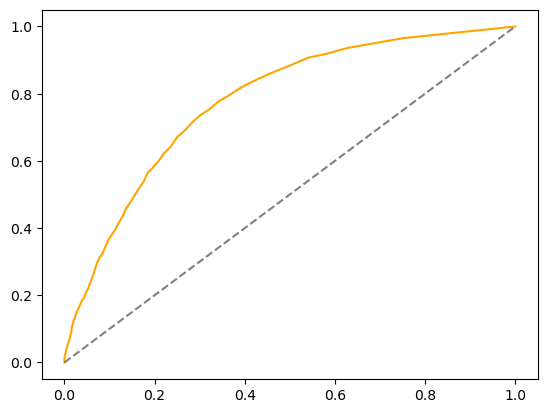

Most impactful features in descending order: [('purchase_lead', 0.1449092723022955), ('flight_hour', 0.11992472393953987), ('length_of_stay', 0.11015564283136987), ('num_passengers', 0.04608125328802671), ('flight_duration', 0.03718934618994222)]
Fold 2 accuracy: 0.8494
F1 score: 0.20063694267515922
Precision: 0.49736842105263157
Recall: 0.12566489361702127


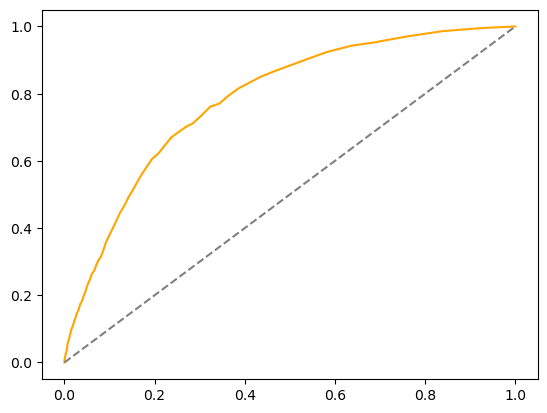

Most impactful features in descending order: [('purchase_lead', 0.1468480726814533), ('flight_hour', 0.11995380052788292), ('length_of_stay', 0.11037171108836487), ('num_passengers', 0.047253257370947495), ('flight_duration', 0.0377041926266756)]
Fold 3 accuracy: 0.8508
F1 score: 0.208067940552017
Precision: 0.5521126760563381
Recall: 0.12818835840418574


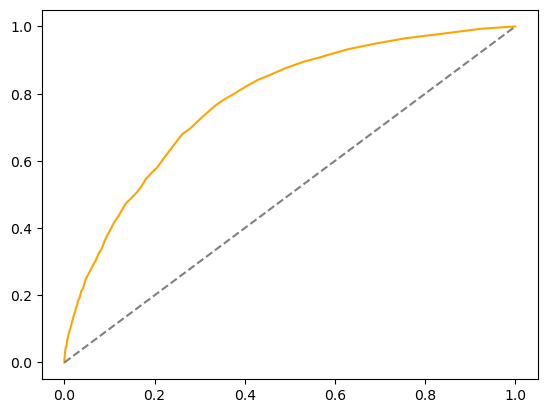

Most impactful features in descending order: [('purchase_lead', 0.14661095546250216), ('flight_hour', 0.12281536112525393), ('length_of_stay', 0.1111528092071529), ('num_passengers', 0.04844303540350429), ('flight_duration', 0.036443855959460376)]
Fold 4 accuracy: 0.8487
F1 score: 0.21074595722483047
Precision: 0.5037406483790524
Recall: 0.13324538258575197


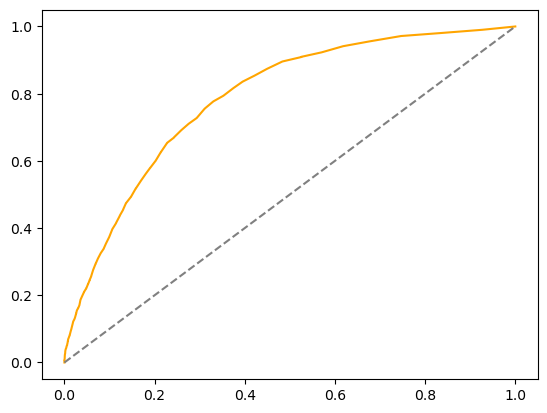

Most impactful features in descending order: [('purchase_lead', 0.14461187424091515), ('flight_hour', 0.12064052934881317), ('length_of_stay', 0.11083182685285042), ('num_passengers', 0.04615676757205089), ('flight_duration', 0.037338725156638976)]
Fold 5 accuracy: 0.8587
F1 score: 0.21890547263681592
Precision: 0.5251989389920424
Recall: 0.138268156424581


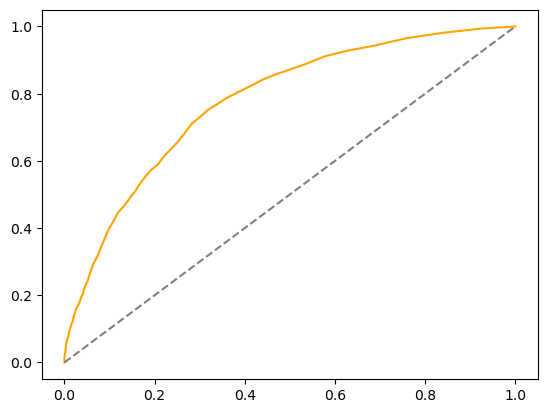

In [10]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt


predictors = df.columns[:-1]
k = 5

kF = KFold(n_splits = k, shuffle = True)
clf = RandomForestClassifier()
enc = OneHotEncoder(sparse_output = False)

categorical = ['sales_channel',
                    'trip_type',
                    'flight_day',
                    'route',
                    'booking_origin']

x = df.drop(columns = ['booking_complete'])
# print(x.shape)

# using one-hot encoding for the categorical variables, and creating post encoded df
x_enc = enc.fit_transform(x[categorical])
x_enc_df = pd.DataFrame(x_enc, columns = enc.get_feature_names_out(categorical))
df_post_enc = pd.concat([x.drop(columns = categorical), x_enc_df,df['booking_complete']], axis = 1)

#need to rename the target variable after processing with one-hot encoding
df_post_enc.rename(columns = {0:'booking_complete'},inplace = True)
df_post_enc = df_post_enc.fillna('-1')

i=0
for train_index,test_index in kF.split(df_post_enc):
    
    train = df_post_enc.iloc[train_index]
    test = df_post_enc.iloc[test_index]
    
    y_train = train['booking_complete']
    x_train = train.drop(columns = ['booking_complete'])
    
    y_test = test['booking_complete']
    x_test = test.drop(columns = ['booking_complete'])
    
    clf.fit(x_train,y_train)
    
    feature_importance = sorted(list(zip(x_train.columns,clf.feature_importances_)),
                                key = lambda x: x[1], reverse = True)
    print("Most impactful features in descending order:", feature_importance[:5])
    print(f"Fold {i+1} accuracy:",clf.score(x_test,y_test))
    print("F1 score:",f1_score(y_test,clf.predict(x_test)))
    print("Precision:", precision_score(y_test,clf.predict(x_test)))
    print("Recall:", recall_score(y_test,clf.predict(x_test)))
    i += 1
    
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1])
    auroc = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,color = 'orange')
    plt.plot([0,1],[0,1],color = 'grey', linestyle = "--")
    plt.show()
